<a href="https://colab.research.google.com/github/LuizVicenteJr/Cardio-disease/blob/main/cardio_diseases_cycle3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 IMPORTS

In [327]:
import warnings
warnings.simplefilter('ignore')

import time
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import plotly.graph_objects as go
from plotly.subplots import make_subplots 
import plotly.express as px

from sklearn import decomposition 
from sklearn.preprocessing import StandardScaler 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import pickle
from google.colab import drive
pd.set_option('display.max_columns', None)

## 0.1 LOAD DATA

In [276]:
data = pd.read_csv('/content/cardio_train.csv',sep=';')

# 1.0 DATA DESCRIPTION

In [277]:
df1 = data.copy()

## 1.1 DATA DIMENSIONS

In [278]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 70000
Number of Cols: 13


## 1.2 Data Types

In [279]:
df1.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## 1.3 Check NA

In [280]:
df1.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 1.4 Descriptive Statistics

In [281]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )

### 1.4.1 NUMERICAL ATTRIBUTES

In [282]:
# Central Tendency 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion 
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.0,99999.0,99999.0,49972.419900,50001.5,28851.096242,-0.001278,-1.198374
1,age,10798.0,23713.0,12915.0,19468.865814,19703.0,2467.234044,-0.307055,-0.823447
2,gender,1.0,2.0,1.0,1.349571,1.0,0.476835,0.630960,-1.601935
3,height,55.0,250.0,195.0,164.359229,165.0,8.210068,-0.642187,7.943653
4,weight,10.0,200.0,190.0,74.205690,72.0,14.395654,1.012070,2.586825
5,ap_hi,-150.0,16020.0,16170.0,128.817286,120.0,154.010319,85.296214,7580.074738
6,ap_lo,-70.0,11000.0,11070.0,96.630414,80.0,188.471184,32.114083,1425.914585
7,cholesterol,1.0,3.0,2.0,1.366871,1.0,0.680245,1.587123,0.993901
8,gluc,1.0,3.0,2.0,1.226457,1.0,0.572266,2.397462,4.294377
9,smoke,0.0,1.0,1.0,0.088129,0.0,0.283482,2.905867,6.444250


*  age = age of person in days
* height = height of person in cm
* weight = weight of person in kg
* ap_hi = systolic blood pressure , normal value = 120 mmhg
* ap_lo = diastolic blood pressure , normal value = 80 mmhg
* cholesterol = adults normal value = 200 mg/dL, children normal value = 170 mg/dL

* gluc = glucose level , normal value = 70 ~80 mg/dL
* smoke = 0 : 'Not a Smoker', 1 : 'Smoker'
* alco = 0 : 'Not a Alchoalic', 1 : 'Alchoalic'
* active = 0 : 'Not involved in Physical Activites', 1 : 'involved in physical activites'

* cardio = 0 : 'Not Have Cardiovascular diseases', 1 : 'Have Cardiovascular diseases'

# 2.0 Feature Engineering

In [283]:
df2 = df1.copy()

In [284]:
#Body max index
df2['bmi'] = df1['weight'] / ((df1['height'] / 100) ** 2)
df2['bmi'] = df2['bmi'].astype('int64')

# Pulse pression
df2['pulse_pression'] = df1['ap_hi'] - df1['ap_lo']

## 2.1 MODEL SCORE

In [285]:
def calculate_score(age, gender, cholesterol, systolic_bp, smoke):
    score = age
    if gender == 1:  # Mulher
        score += 5
    if cholesterol == 3:  # Colesterol acima do normal
        score += 1
    if systolic_bp > 140:  # Pressão arterial sistólica acima do normal
        score += 1
    if smoke == 1:  # Fumante
        score += 4
    return score

# Calcula o modelo SCORE para cada linha do dataframe e adiciona a coluna 'model_score'
df2['model_score'] = df2.apply(lambda x: calculate_score(x['age'], x['gender'], x['cholesterol'], x['ap_hi'],x['smoke']), axis=1)
df2['model_score'] = df2['model_score'].astype('int64')

# 3.0 EDA

In [286]:
df3= df2.copy()

In [287]:
df3.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pression,model_score
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21,30,18393
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34,50,20234
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23,60,18863
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28,50,17624
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23,40,17479


## 3.1 CARDIO(TARGET)

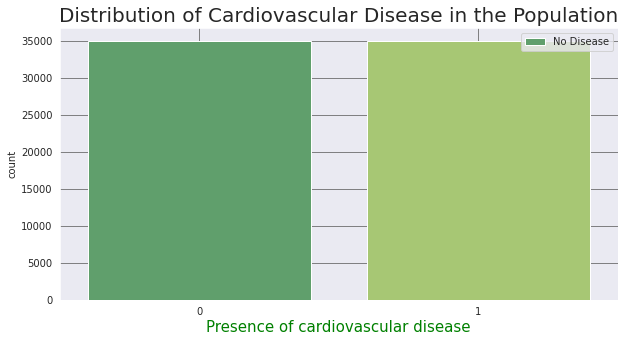

In [288]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(df2['cardio'], palette='summer')
plt.xlabel('Presence of cardiovascular disease', fontdict={'fontsize': 15,'color':'Green'}, labelpad=3)
plt.title('Distribution of Cardiovascular Disease in the Population', fontsize=20)
plt.legend(['No Disease', 'Disease'])
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

## 3.2 GENDER

women's average weight lower than men's average weight 

In [289]:
a = df3[df3["gender"]==2]["height"].mean()
b = df3[df3["gender"]==1]["height"].mean()
if a > b:
    gender = "male"
    gender1 = "female"
else:
    gender = "female"
    gender1 = "male"
print("Gender 2 is " + gender + " e Gender 1 is " + gender1)

Gender 2 is male e Gender 1 is female


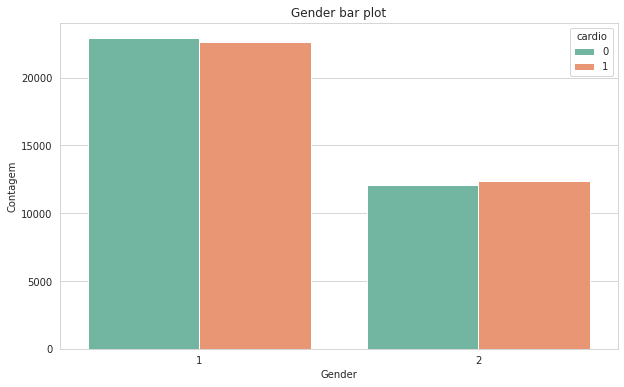

In [290]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='cardio', data=df2, palette="Set2")

plt.title("Gender bar plot")
plt.xlabel("Gender")
plt.ylabel("Contagem")


plt.show()

## 3.3 AGE

In [291]:
df3['age'] = df3['age'] / 365 # days for years
df3['age'] = df3['age'].round()

### 3.3.1 VIOLIN PLOT

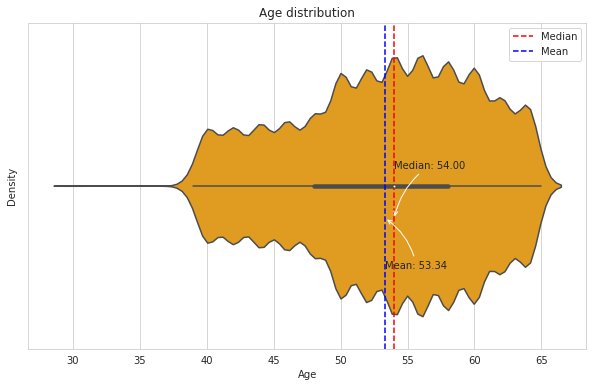

In [292]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(df3['age'], color='orange', ax=ax)

median = df3['age'].median()
mean = df3['age'].mean()
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.axvline(median, color='red', label='Median', linestyle='--')
plt.axvline(mean, color='blue', label='Mean', linestyle='--')
plt.annotate(f'Median: {median:.2f}', xy=(median, 0.1), xycoords='data',
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.1), xycoords='data',
             xytext=(0, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.legend()
plt.show()

### 3.3.2 GENDER BY AGE

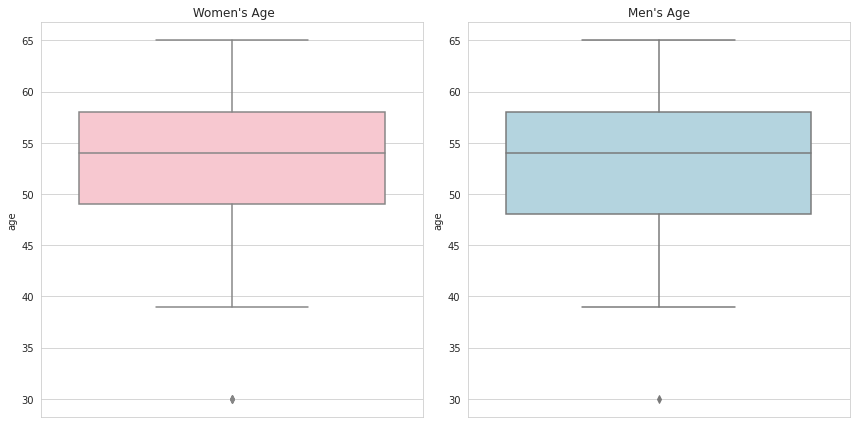

In [293]:
#gender
df_female = df3[df3['gender'] == 1]
df_male = df3[df3['gender'] == 2]

# boxplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(data=df_female, y='age', ax=axes[0], color='pink')
sns.boxplot(data=df_male, y='age', ax=axes[1], color='lightblue')

# plot
axes[0].set_title(" Women's Age")
axes[1].set_title("Men's Age")
plt.tight_layout()
plt.show()

In [294]:
df_female[df_female['age'] <= 30]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pression,model_score
6219,8850,30.0,1,175,59.0,120,80,1,1,0,0,1,0,19,40,10883
30666,43842,30.0,1,159,59.0,120,80,1,1,0,0,1,0,23,40,10864
55905,79749,30.0,1,160,59.0,110,70,1,1,0,0,1,0,23,40,10969


In [295]:
df_male[df_male['age'] <= 30]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pression,model_score
22343,31922,30.0,2,175,92.0,100,60,1,1,0,0,1,0,30,40,10798


## 3.4 Height

### 3.4.1 VIOLIN PLOT

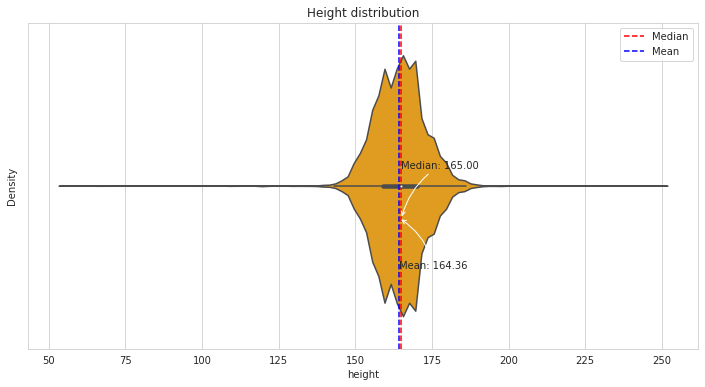

In [296]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(df3['height'], color='orange', ax=ax)

median = df3['height'].median()
mean = df3['height'].mean()
plt.title("Height distribution")
plt.xlabel("height")
plt.ylabel("Density")
plt.axvline(median, color='red', label='Median', linestyle='--')
plt.axvline(mean, color='blue', label='Mean', linestyle='--')
plt.annotate(f'Median: {median:.2f}', xy=(median, 0.1), xycoords='data',
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.1), xycoords='data',
             xytext=(0, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.legend()
plt.show()

## 3.4.2 HEIGHT BY GENDER

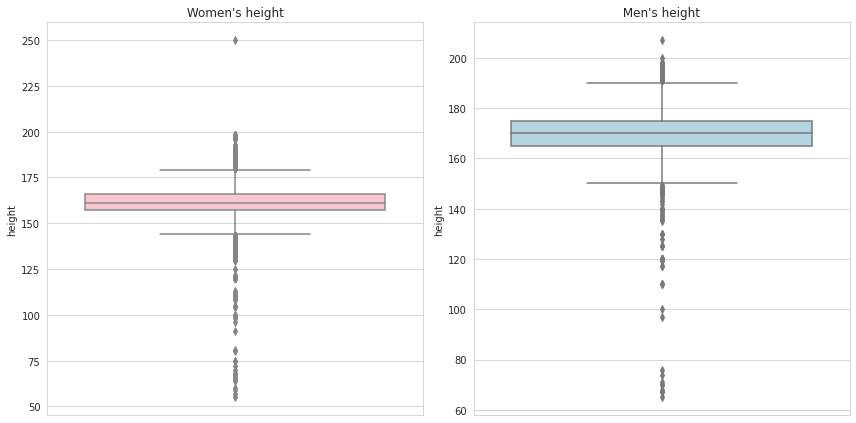

In [297]:
#gender
df_female = df3[df3['gender'] == 1]
df_male = df3[df3['gender'] == 2]

# boxplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(data=df_female, y='height', ax=axes[0], color='pink')
sns.boxplot(data=df_male, y='height', ax=axes[1], color='lightblue')

# plot
axes[0].set_title(" Women's height ")
axes[1].set_title(" Men's height ")
plt.tight_layout()
plt.show()

In [298]:
df_female[df_female['height']> 240]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pression,model_score
6486,9223,58.0,1,250,86.0,140,100,3,1,0,0,1,1,13,40,21226


In [299]:
#filter
df3 = df3.drop(df3[(df3['height'] == 250) & (df3['gender'] == 1)].index)

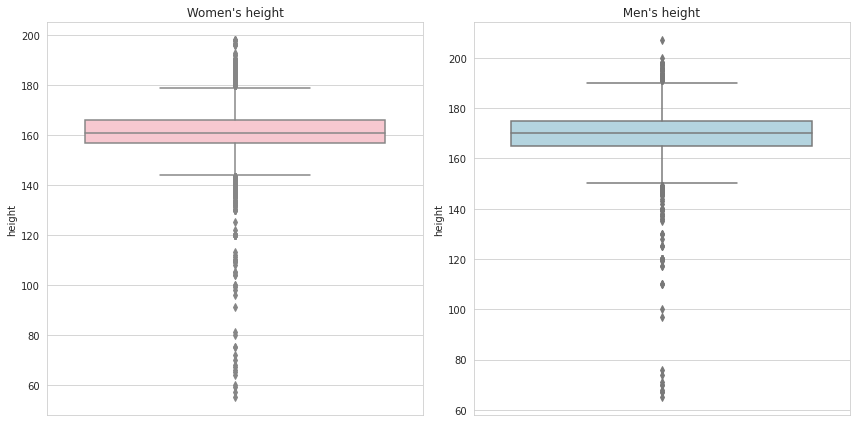

In [300]:
#gender
df_female = df3[df3['gender'] == 1]
df_male = df3[df3['gender'] == 2]

# boxplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(data=df_female, y='height', ax=axes[0], color='pink')
sns.boxplot(data=df_male, y='height', ax=axes[1], color='lightblue')

# plot
axes[0].set_title(" Women's height ")
axes[1].set_title(" Men's height ")
plt.tight_layout()
plt.show()

## 3.5 Weight

### 3.5.1 VIOLIN PLOT

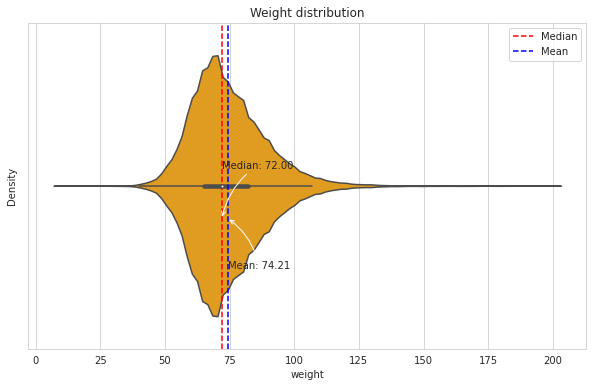

In [301]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(df3['weight'], color='orange', ax=ax)

median = df3['weight'].median()
mean = df3['weight'].mean()
plt.title("Weight distribution")
plt.xlabel("weight")
plt.ylabel("Density")
plt.axvline(median, color='red', label='Median', linestyle='--')
plt.axvline(mean, color='blue', label='Mean', linestyle='--')
plt.annotate(f'Median: {median:.2f}', xy=(median, 0.1), xycoords='data',
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.1), xycoords='data',
             xytext=(0, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.legend()
plt.show()

### 3.5.2 WEIGHT BY GENDER

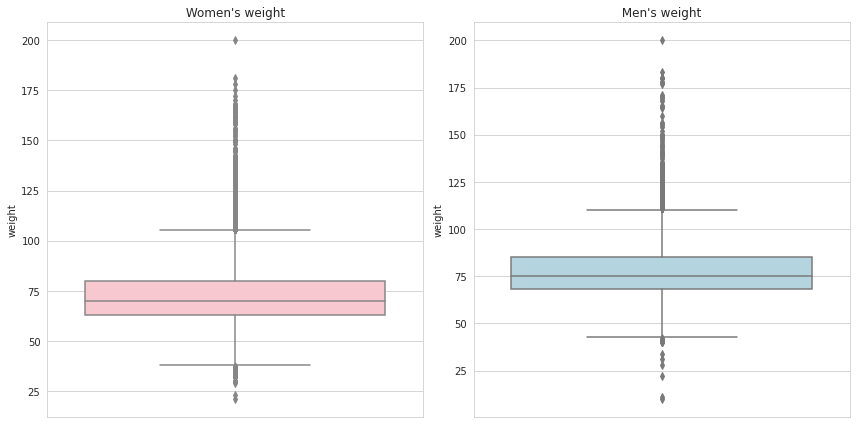

In [302]:
#gender
df_female = df3[df3['gender'] == 1]
df_male = df3[df3['gender'] == 2]

# boxplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(data=df_female, y='weight', ax=axes[0], color='pink')
sns.boxplot(data=df_male, y='weight', ax=axes[1], color='lightblue')

# plot
axes[0].set_title(" Women's weight ")
axes[1].set_title(" Men's weight ")
plt.tight_layout()
plt.show()

## 3.6 AP_HI (systolic blood pressure)

### 3.6.1 VIOLIN PLOT

In [303]:
#filter
df3 = df3[(df3['ap_hi'] > 0) & (df3['ap_hi'] < 300)]

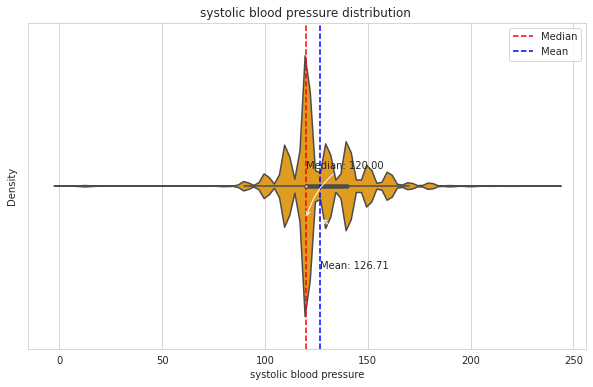

In [304]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(df3['ap_hi'], color='orange', ax=ax)

median = df3['ap_hi'].median()
mean = df3['ap_hi'].mean()
plt.title("systolic blood pressure distribution ")
plt.xlabel("systolic blood pressure")
plt.ylabel("Density")
plt.axvline(median, color='red', label='Median', linestyle='--')
plt.axvline(mean, color='blue', label='Mean', linestyle='--')
plt.annotate(f'Median: {median:.2f}', xy=(median, 0.1), xycoords='data',
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.1), xycoords='data',
             xytext=(0, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.legend()
plt.show()

### 3.6.2 AP_HI BY GENDER

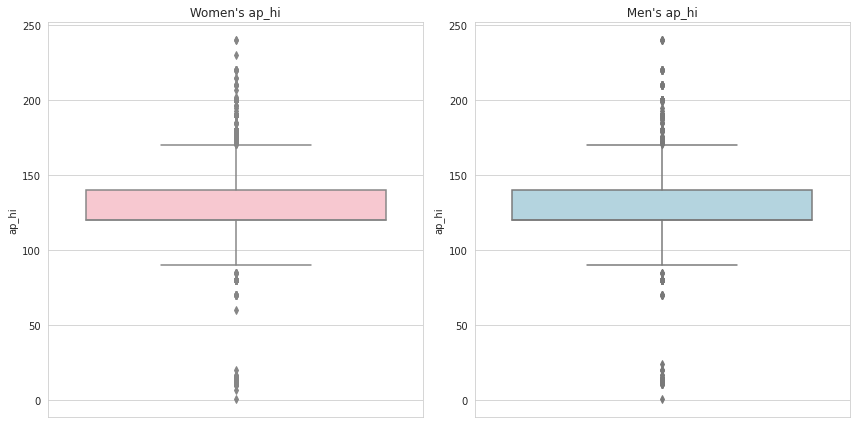

In [305]:
#gender
df_female = df3[df3['gender'] == 1]
df_male = df3[df3['gender'] == 2]

# boxplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(data=df_female, y='ap_hi', ax=axes[0], color='pink')
sns.boxplot(data=df_male, y='ap_hi', ax=axes[1], color='lightblue')

# plot
axes[0].set_title(" Women's ap_hi ")
axes[1].set_title(" Men's ap_hi ")
plt.tight_layout()
plt.show()

## 3.7 AP_LO
     

In [306]:
df3 = df3[(df3['ap_lo'] > 0) & (df3['ap_lo'] < 300)]

### 3.7.1 VIOLIN PLOT

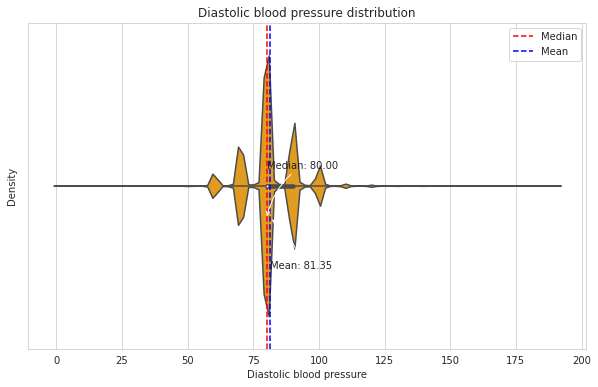

In [307]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(df3['ap_lo'], color='orange', ax=ax)

median = df3['ap_lo'].median()
mean = df3['ap_lo'].mean()
plt.title("Diastolic blood pressure distribution")
plt.xlabel("Diastolic blood pressure")
plt.ylabel("Density")
plt.axvline(median, color='red', label='Median', linestyle='--')
plt.axvline(mean, color='blue', label='Mean', linestyle='--')
plt.annotate(f'Median: {median:.2f}', xy=(median, 0.1), xycoords='data',
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.1), xycoords='data',
             xytext=(0, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))
plt.legend()
plt.show()

### 3.7.2 AP_LO BY GENDER

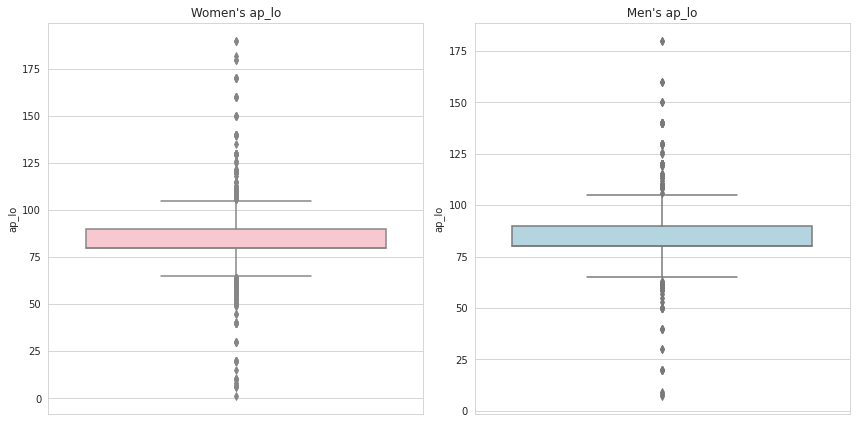

In [308]:
#gender
df_female = df3[df3['gender'] == 1]
df_male = df3[df3['gender'] == 2]

# boxplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(data=df_female, y='ap_lo', ax=axes[0], color='pink')
sns.boxplot(data=df_male, y='ap_lo', ax=axes[1], color='lightblue')

# plot
axes[0].set_title(" Women's ap_lo ")
axes[1].set_title(" Men's ap_lo ")
plt.tight_layout()
plt.show()

## 3.8 CHOLESTEROL

In [309]:
df3['cholesterol']=df3['cholesterol'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})

### 3.8.1 BAR PLOT

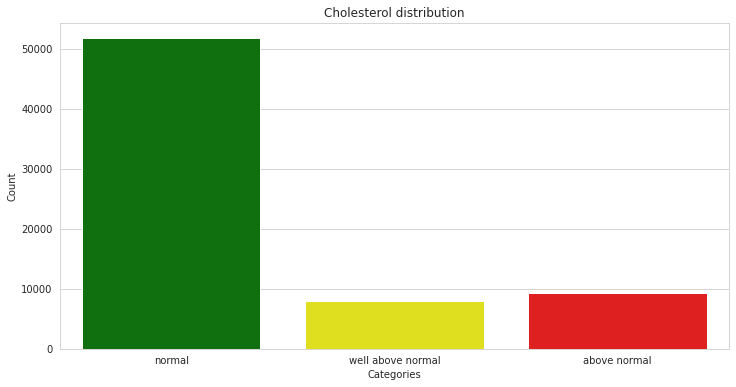

In [310]:
sns.countplot(x='cholesterol', data=df3, palette=['green', 'yellow', 'red'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Cholesterol distribution')

fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()

### 3.8.2 CHOLESTEROL BY GENDER

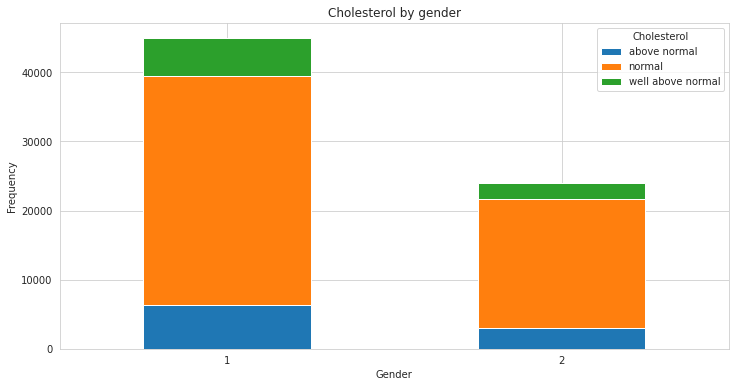

In [311]:
#contigency_table
contingency_table = pd.crosstab(df3['gender'], df3['cholesterol'])
contingency_table.plot(kind='bar', stacked=True, figsize=(12,6))
#plot
plt.title('Cholesterol by gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Cholesterol')

plt.show()

## 3.9 GLUCOSE


In [312]:
df3['gluc']=df3['gluc'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})

### 3.9.1 BAR PLOT

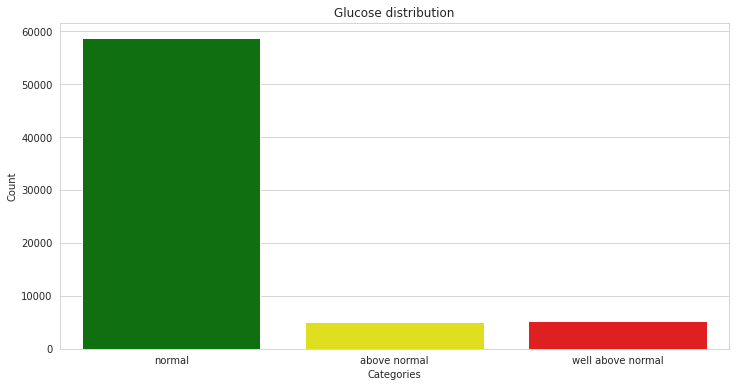

In [313]:
sns.countplot(x='gluc', data=df3, palette=['green', 'yellow', 'red'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Glucose distribution')

fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()

### 3.9.2 GLUCOSE BY GENDER

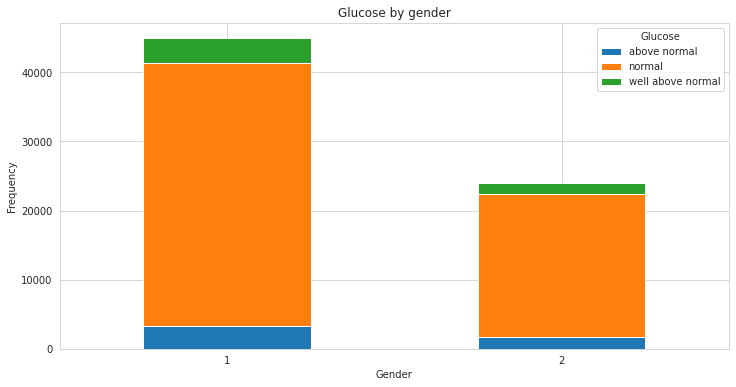

In [314]:
#contigency_table
contingency_table = pd.crosstab(df2['gender'], df3['gluc'])
contingency_table.plot(kind='bar', stacked=True, figsize=(12,6))
#plot
plt.title('Glucose by gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Glucose')

plt.show()

## 3.10 SMOKE

In [315]:
df3['smoke']=df3['smoke'].map({ 0: 'not a smoker', 1: 'smoker'})

### 3.10.1 BAR PLOT

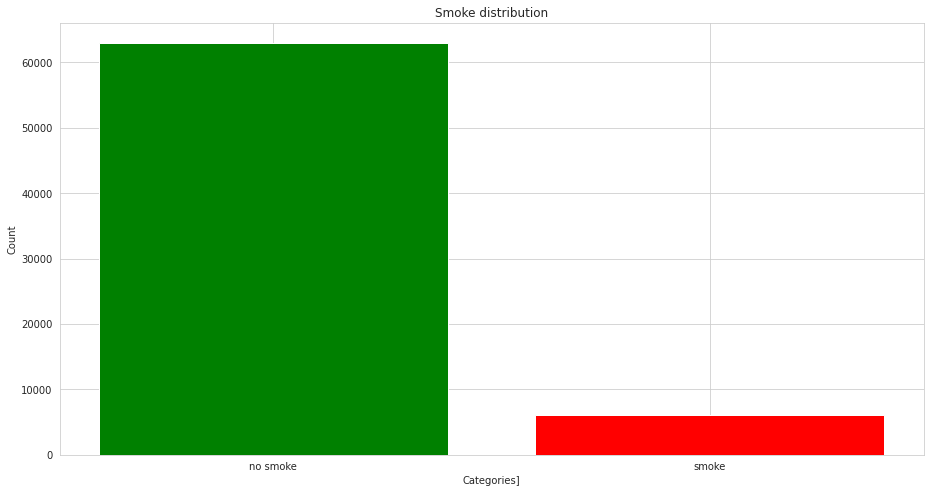

In [316]:
glucose = df3['smoke'].value_counts()
categories = ['no smoke', 'smoke']
colors = ['green','red']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(categories, glucose , color= colors)

plt.xlabel('Categories]')
plt.ylabel('Count')
plt.title('Smoke distribution')

plt.show()

### 3.10.2 SMOKE BY GENDER

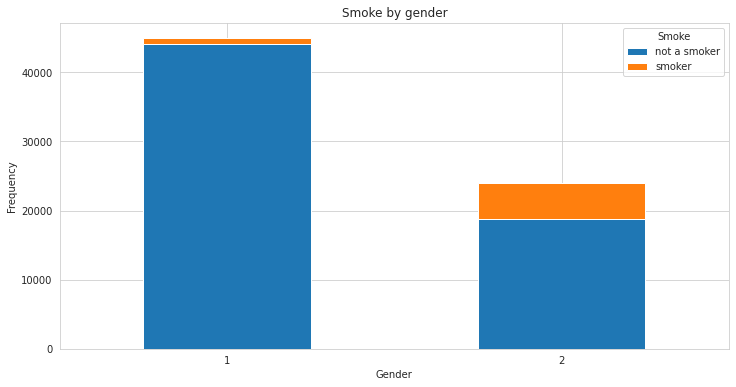

In [317]:
#contigency_table
contingency_table = pd.crosstab(df3['gender'], df3['smoke'])
contingency_table.plot(kind='bar', stacked=True, figsize=(12,6))
#plot
plt.title('Smoke by gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Smoke')

plt.show()

## 3.11 ALCO

In [318]:
df3['alco']=df3['alco'].map({ 0: 'no drink', 1: 'drink'})

### 3.11.1 BAR PLOT

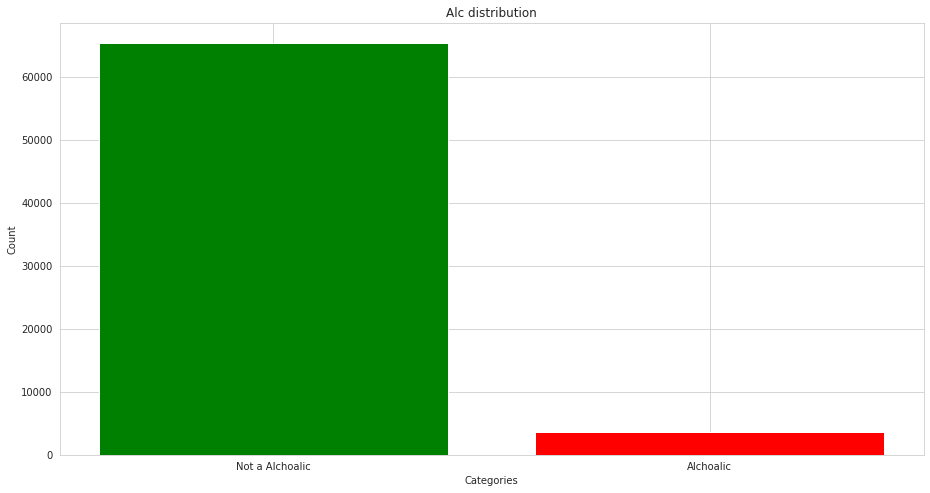

In [319]:
glucose = df3['alco'].value_counts()
categories = ['Not a Alchoalic', 'Alchoalic']
colors = ['green','red']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(categories, glucose , color= colors)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Alc distribution')

plt.show()

### 3.11.2 ALCOHOLIC BY GENDER

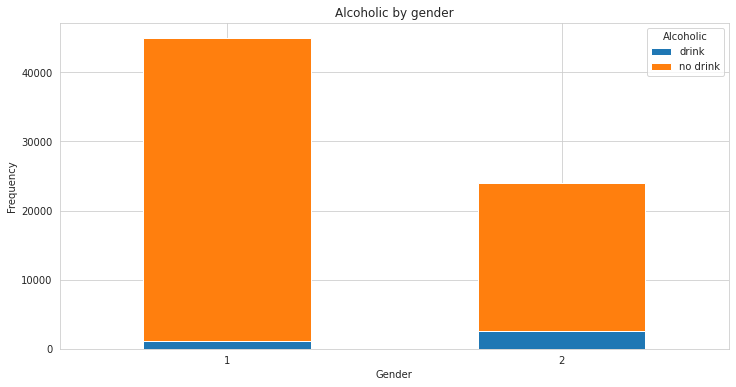

In [320]:
#contigency_table
contingency_table = pd.crosstab(df3['gender'], df3['alco'])
contingency_table.plot(kind='bar', stacked=True, figsize=(12,6))
#plot
plt.title('Alcoholic by gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Alcoholic')

plt.show()

## 3.12 ACTIVE

In [321]:
df3['active']=df3['active'].map({ 0: 'no active', 1: 'active'})

### 3.12.1 BAR PLOT

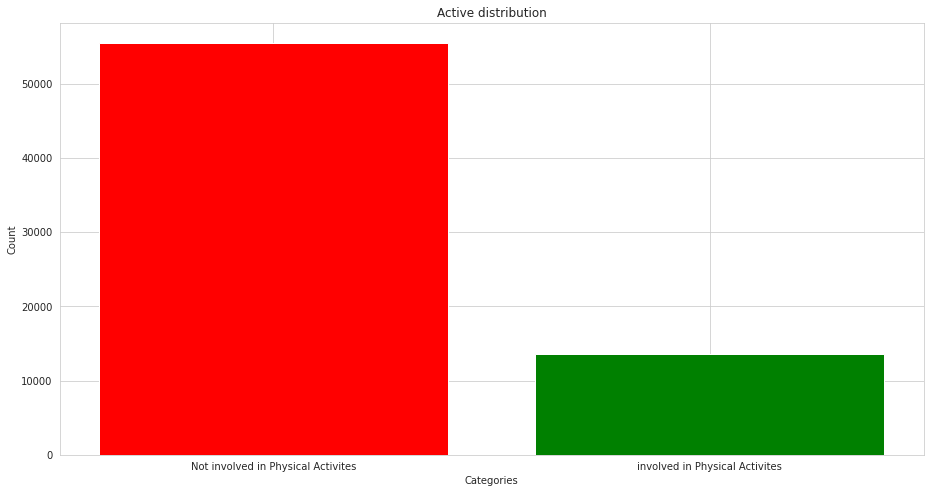

In [322]:
active = df3['active'].value_counts()
categories = ['Not involved in Physical Activites', 'involved in Physical Activites']
colors = ['red','green']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(categories, active , color= colors)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Active distribution')

plt.show()

### 3.12.2 ACTIVE BY GENDER

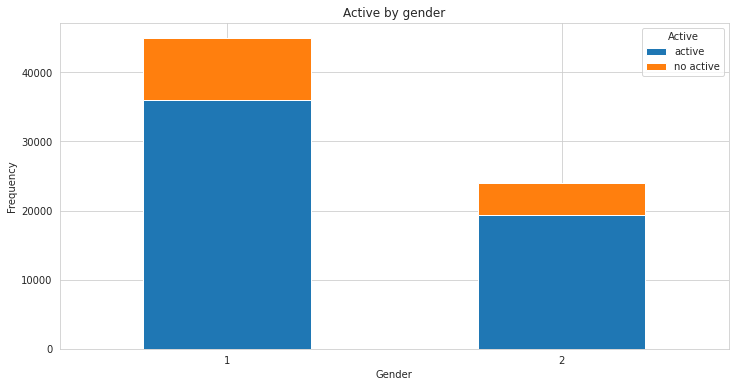

In [323]:
#contigency_table
contingency_table = pd.crosstab(df3['gender'], df3['active'])
contingency_table.plot(kind='bar', stacked=True, figsize=(12,6))
#plot
plt.title('Active by gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Active')

plt.show()

# 4.0 OUTLIERS

In [324]:
df4 = df3.copy()

In [325]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {} and No of Data is {}'.format(each_feature, len(outliers),df4[each_feature].shape[0]))
outliers(df4[['weight','age','ap_hi','ap_lo']])

For the feature weight, No of Outliers is 1752 and No of Data is 68984
For the feature age, No of Outliers is 4 and No of Data is 68984
For the feature ap_hi, No of Outliers is 1245 and No of Data is 68984
For the feature ap_lo, No of Outliers is 3651 and No of Data is 68984


# 5.0 PREPOCESSING

In [326]:
df5= df4.copy()

## 5.1 GET DUMMIES

In [328]:
cholesterol_encoded = pd.get_dummies(df5['cholesterol'], prefix='cholesterol')
gluc_encoded = pd.get_dummies(df5['gluc'], prefix='gluc')
smoke_encoded = pd.get_dummies(df5['smoke'], prefix='smoke')
alco_encoded = pd.get_dummies(df5['alco'], prefix='alco')
active_encoded = pd.get_dummies(df5['active'], prefix='active')

df_encoded = pd.concat([df5, cholesterol_encoded, gluc_encoded, smoke_encoded, alco_encoded, active_encoded], axis=1)

df5 = df_encoded.drop(['cholesterol', 'gluc', 'smoke', 'alco', 'active'], axis=1)

In [330]:
df5.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cardio,bmi,pulse_pression,model_score,cholesterol_above normal,cholesterol_normal,cholesterol_well above normal,gluc_above normal,gluc_normal,gluc_well above normal,smoke_not a smoker,smoke_smoker,alco_drink,alco_no drink,active_active,active_no active
0,0,50.0,2,168,62.0,110,80,0,21,30,18393,0,1,0,0,1,0,1,0,0,1,1,0
1,1,55.0,1,156,85.0,140,90,1,34,50,20234,0,0,1,0,1,0,1,0,0,1,1,0
2,2,52.0,1,165,64.0,130,70,1,23,60,18863,0,0,1,0,1,0,1,0,0,1,0,1
3,3,48.0,2,169,82.0,150,100,1,28,50,17624,0,1,0,0,1,0,1,0,0,1,1,0
4,4,48.0,1,156,56.0,100,60,0,23,40,17479,0,1,0,0,1,0,1,0,0,1,0,1


## 5.3 Correlation of Variables

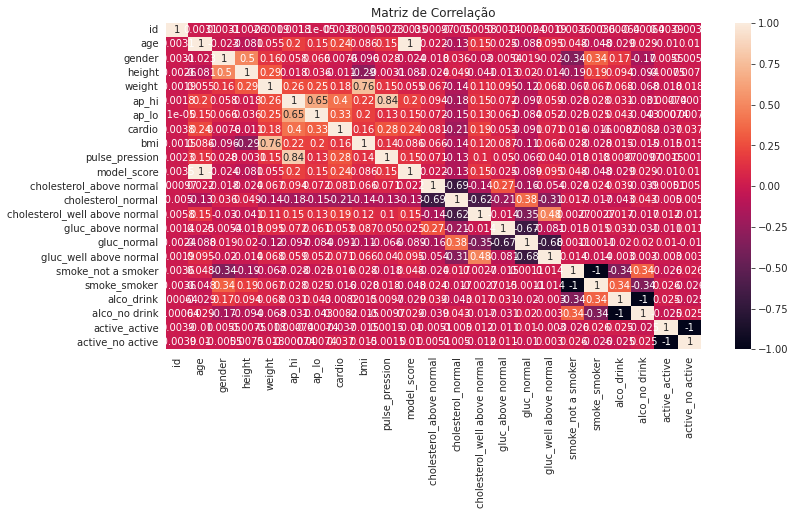

In [331]:
corr = df5.corr()

# plot
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True)
plt.title('Matriz de Correlação')
plt.show()

## 5.4 CORRELATION WITH TARGET

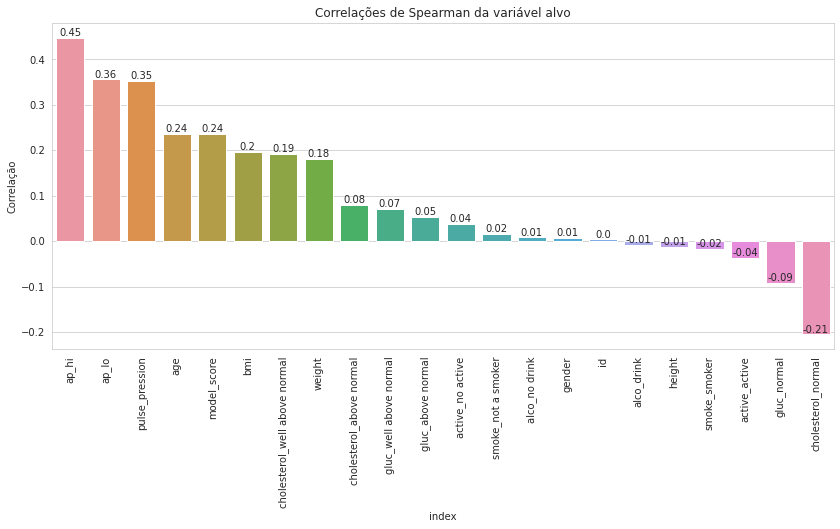

In [332]:
corr = df5.corr(method='spearman')


target_corr = corr.loc['cardio']
target_corr = target_corr.sort_values(ascending=False)
target_corr = target_corr.drop('cardio')
target_corr = pd.DataFrame(target_corr)
target_corr['index'] = target_corr.index
target_corr = target_corr.reset_index(drop=True)

# plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=target_corr['index'], y=target_corr['cardio'])
plt.title('Correlações de Spearman da variável alvo')
plt.ylabel('Correlação')
plt.xticks(rotation=90)

# values
for i, v in enumerate(target_corr['cardio']):
    ax.text(i, v, round(v, 2), ha='center', va='bottom')

plt.show()

# 6.0 MACHINE LEARNING

In [333]:
final_data = df5.copy()

In [334]:
final_data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio',
       'bmi', 'pulse_pression', 'model_score', 'cholesterol_above normal',
       'cholesterol_normal', 'cholesterol_well above normal',
       'gluc_above normal', 'gluc_normal', 'gluc_well above normal',
       'smoke_not a smoker', 'smoke_smoker', 'alco_drink', 'alco_no drink',
       'active_active', 'active_no active'],
      dtype='object')

### 6.1 SPLITTING AND STANDARDIZING DATA

In [335]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(['cardio'],axis=1),final_data.cardio,test_size=0.30, random_state=42)

to_be_scaled_feat = ['age','weight','ap_hi','model_score','cholesterol_normal']
scaler=StandardScaler()
scaler.fit(X_train[to_be_scaled_feat])
X_train[to_be_scaled_feat] = scaler.transform(X_train[to_be_scaled_feat])
X_test[to_be_scaled_feat] = scaler.transform(X_test[to_be_scaled_feat])

X_train= X_train[to_be_scaled_feat]
X_test= X_test[to_be_scaled_feat]

In [336]:
X_train

,age,weight,ap_hi,model_score,cholesterol_normal
9658,-1.972428,-0.077982,-1.489798,-1.917435,0.578689
19670,-0.197257,1.246636,1.896105,-0.205699,0.578689
8890,0.838260,-0.077982,0.767470,0.801062,0.578689
39087,0.986191,2.152954,1.331788,1.009147,-1.728043
46854,-0.641050,-0.356849,-0.361164,-0.599155,-1.728043
...,...,...,...,...,...
37741,-0.788981,0.410035,1.331788,-0.756942,-1.728043
6357,-0.493119,-0.565999,-0.361164,-0.455158,0.578689
55680,1.134122,0.131168,3.589056,1.179915,0.578689
871,0.098605,0.758619,0.203153,0.034837,-1.728043


In [337]:
X_test

,age,weight,ap_hi,model_score,cholesterol_normal
16622,-1.824497,1.455786,-0.361164,-1.884579,-1.728043
41666,0.098605,0.549469,-0.925481,0.046600,0.578689
48369,1.429984,-0.705433,-0.925481,1.394491,-1.728043
48097,-0.788981,-0.635716,-0.361164,-0.780063,0.578689
68766,0.838260,-0.635716,-0.361164,0.784431,0.578689
...,...,...,...,...,...
35515,0.986191,-0.635716,1.331788,0.958038,0.578689
7475,-0.493119,3.198705,-1.489798,-0.452318,0.578689
45774,0.542398,-0.426566,0.203153,0.490759,0.578689
24982,0.394467,0.967769,-0.361164,0.354063,-1.728043


In [338]:
y_train

9658     0
19670    1
8890     1
39087    1
46854    1
        ..
37741    1
6357     1
55680    0
871      0
16025    0
Name: cardio, Length: 48288, dtype: int64

## 6.2 K-NEAREST NEIGHBORS

In [339]:
# start_time = time.time()

# error_rate = []
# for i in range(1, 31):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     scores = cross_val_score(knn, X_train, y_train, cv=10)
#     error_rate.append(1 - np.mean(scores))

# plt.figure(figsize=(10,6))
# plt.plot(range(1, 31), error_rate, color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate');

# best_k = np.argmin(error_rate) + 1
# print(f"Best K: {best_k}")

# end_time = time.time()  # Registra o tempo de término
# total_time = end_time - start_time  

# print("Time: {:.2f} segundos".format(total_time))

In [340]:
best_k =30

In [341]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74     10561
           1       0.73      0.68      0.70     10135

    accuracy                           0.72     20696
   macro avg       0.72      0.72      0.72     20696
weighted avg       0.72      0.72      0.72     20696



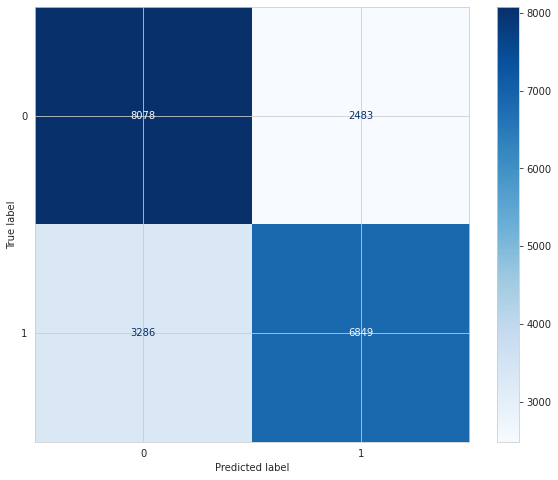

In [342]:
cm = confusion_matrix(y_test, y_pred)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(best_knn, X_test, y_test, cmap=plt.cm.Blues, values_format='.0f', ax=ax)
plt.show()

In [117]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(best_knn, f)

## 6.3 RANDOM FOREST

In [343]:
# start_time = time.time()

# param_grid = {'max_depth': [80, 90, 100],
#               'max_features': [2, 3, 4],
#               'min_samples_leaf': [3, 4, 5],
#               'min_samples_split': [8, 10, 12],
#               'n_estimators': [100, 150, 200]}


# rf = RandomForestClassifier(criterion='gini', bootstrap=True, oob_score=False)

# # GRID SEARCH
# grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
# grid.fit(X_train, y_train)


# best_model = grid.best_estimator_
# print("Melhores parâmetros: ", grid.best_params_)


# end_time = time.time()
# total_time = end_time - start_time


# print("Time: {:.2f} segundos".format(total_time))

In [344]:
params = {
    'max_depth': 80,
    'max_features': 2,
    'min_samples_leaf': 5,
    'min_samples_split': 10,
    'n_estimators': 100
}

best_model = RandomForestClassifier(**params)

#predict

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.74      0.73     10561
           1       0.72      0.69      0.71     10135

    accuracy                           0.72     20696
   macro avg       0.72      0.72      0.72     20696
weighted avg       0.72      0.72      0.72     20696



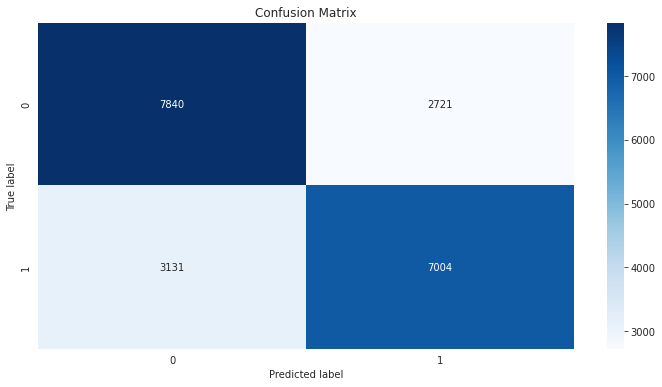

In [345]:
cm = confusion_matrix(y_test, y_pred)

# plot
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [121]:
filename = 'rf.pkl'

pickle.dump(best_model, open(filename, 'wb'))

## 6.4 XGBOOST

In [346]:
# start_time = time.time() 

# # Hyperparams
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.5],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.2]
# }

# xgb_model = xgb.XGBClassifier()

# # GRIDSEARCH
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # best hyperparameters
# print("Best hyperparameters: ", grid_search.best_params_)

# end_time = time.time()  
# total_time = end_time - start_time 

# print("Time: {:.2f} segundos".format(total_time))

In [347]:
params = {
    'gamma': 0.2,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 200
}

best_model = xgb.XGBClassifier(**params)

 # predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Classification Report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74     10561
           1       0.73      0.70      0.72     10135

    accuracy                           0.73     20696
   macro avg       0.73      0.73      0.73     20696
weighted avg       0.73      0.73      0.73     20696



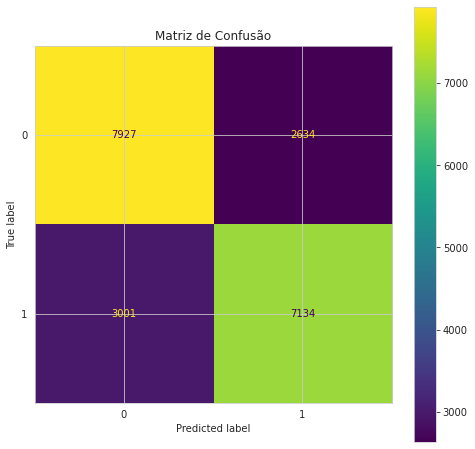

In [348]:
cm = confusion_matrix(y_test, y_pred)

# plot
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(best_model, X_test, y_test, ax=ax)
ax.set_title("Matriz de Confusão")
plt.show()

In [125]:
with open('modelo_xgboost.pkl', 'wb') as f:
    pickle.dump(best_model, f)